# Ensemble learning - Bagging Technique

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
df.shape

(918, 12)

In [52]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [53]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [55]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [56]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

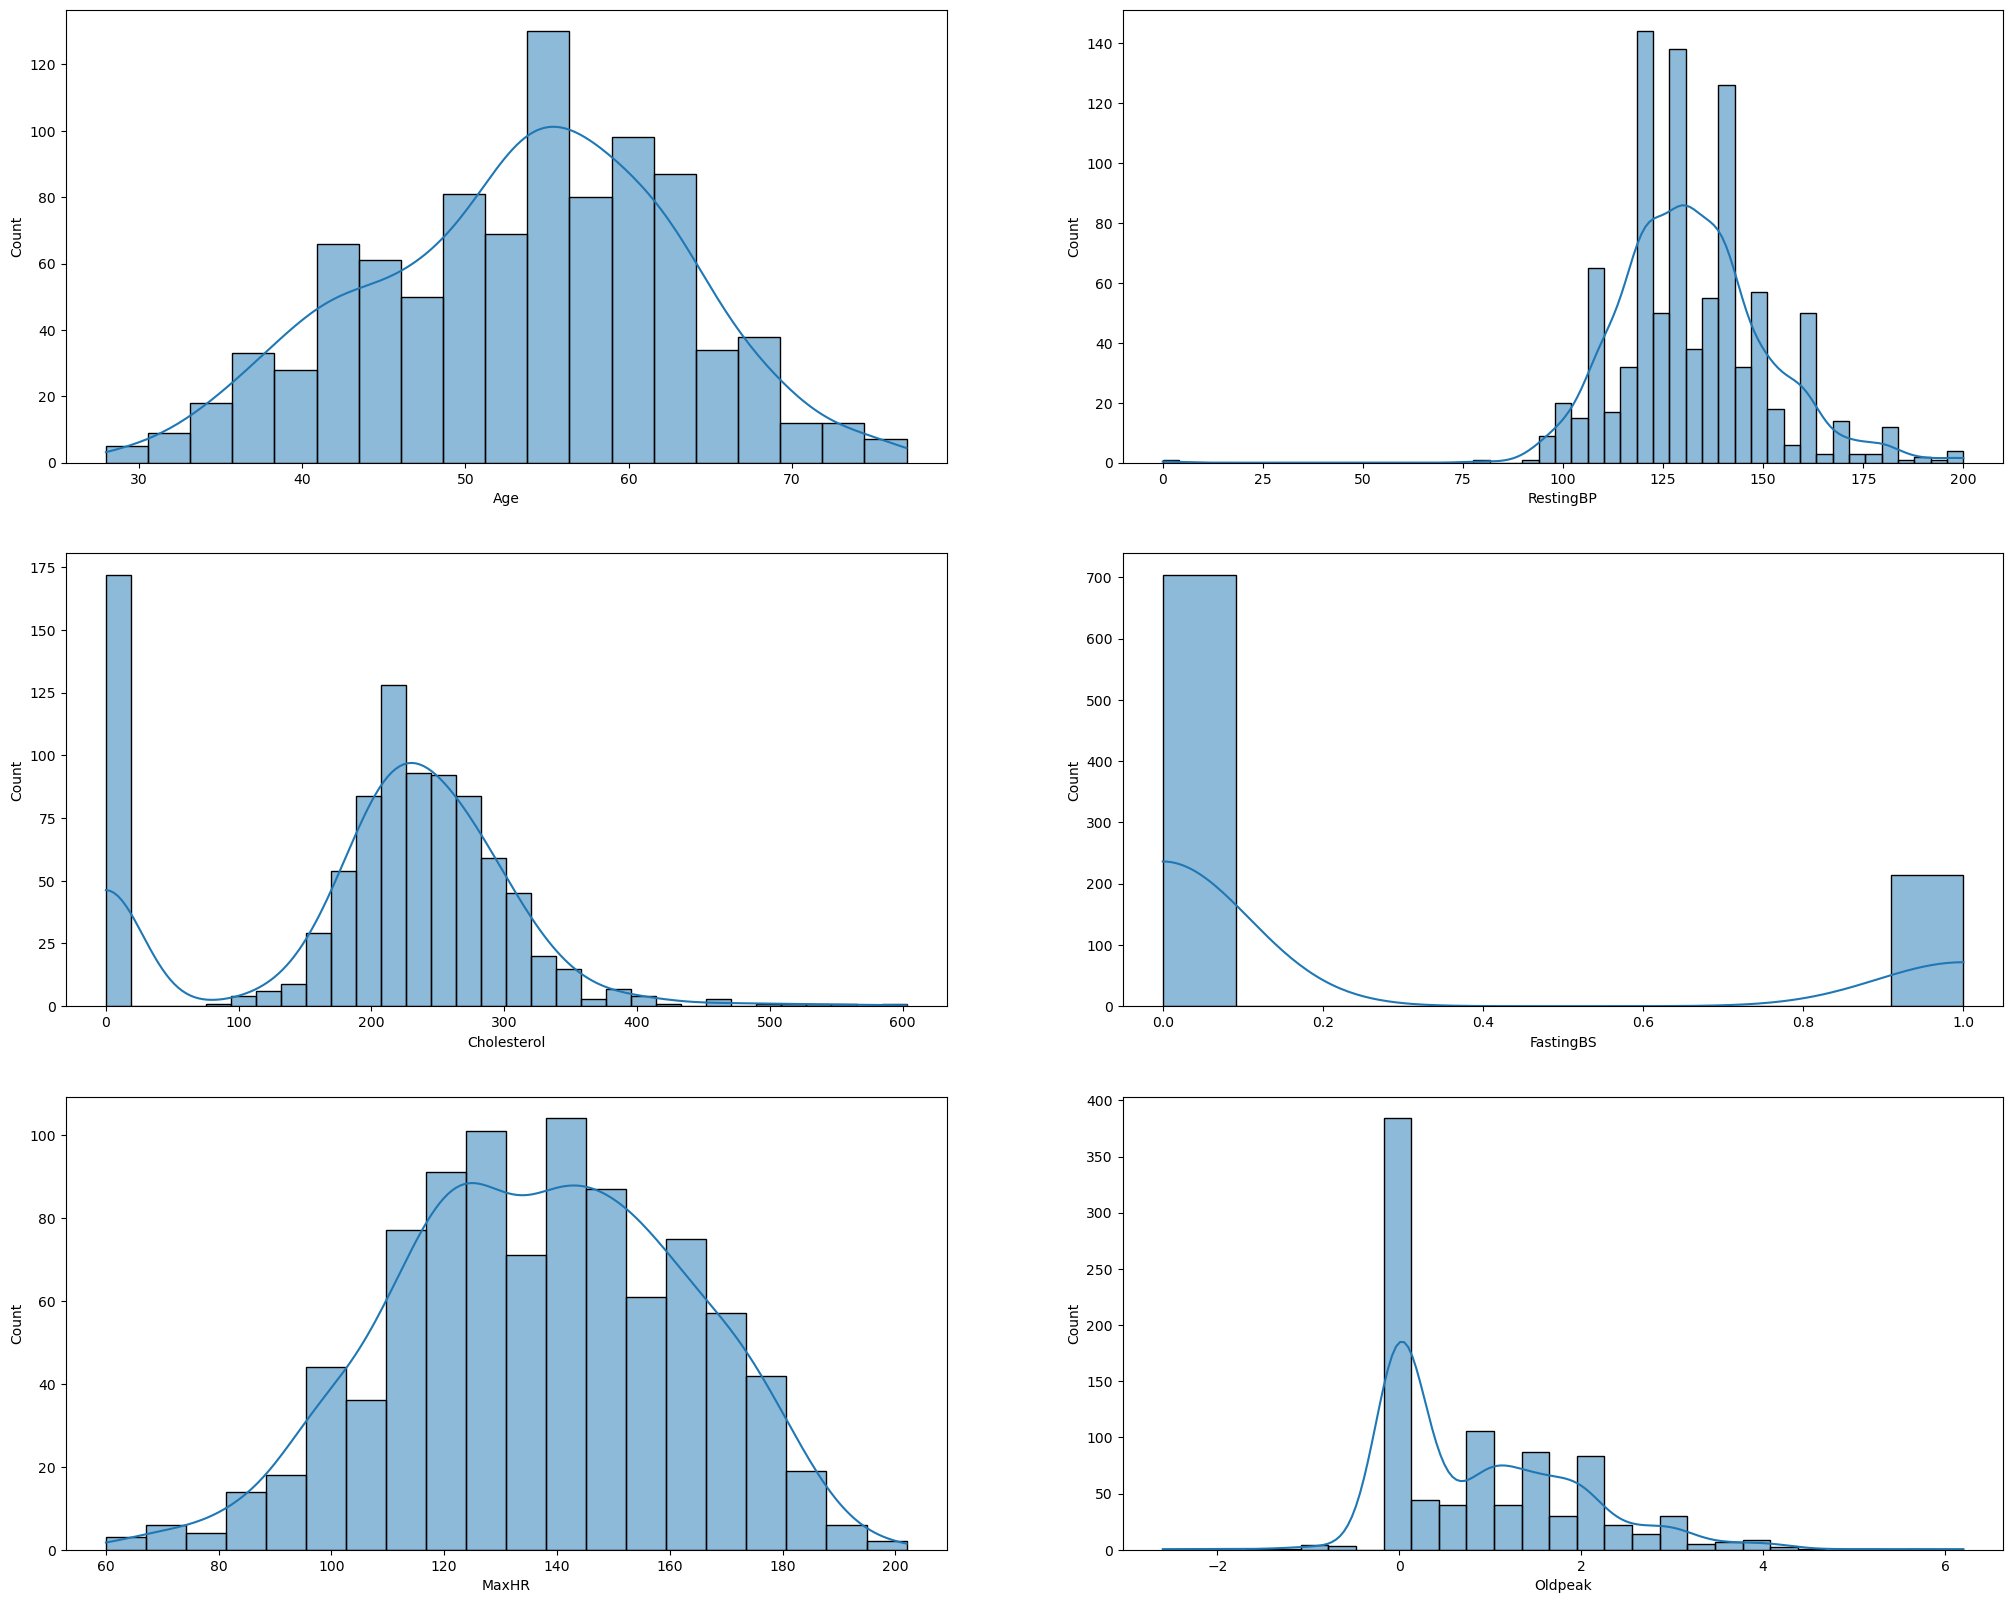

In [58]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.histplot(df['Age'], kde=True)

plt.subplot(3,2,2)
sns.histplot(df['RestingBP'], kde=True)

plt.subplot(3,2,3)
sns.histplot(df['Cholesterol'], kde=True)

plt.subplot(3,2,4)
sns.histplot(df['FastingBS'], kde=True)

plt.subplot(3,2,5)
sns.histplot(df['MaxHR'], kde=True)

plt.subplot(3,2,6)
sns.histplot(df['Oldpeak'], kde=True)

plt.show()

In [59]:
# amoung all this histogram cholestrol columns is normally distributed
# we can use this columns for outlier detection using z score
# let us check the skewness of that columns
df_skew=df.skew().sort_values(ascending=False)
df_skew

FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

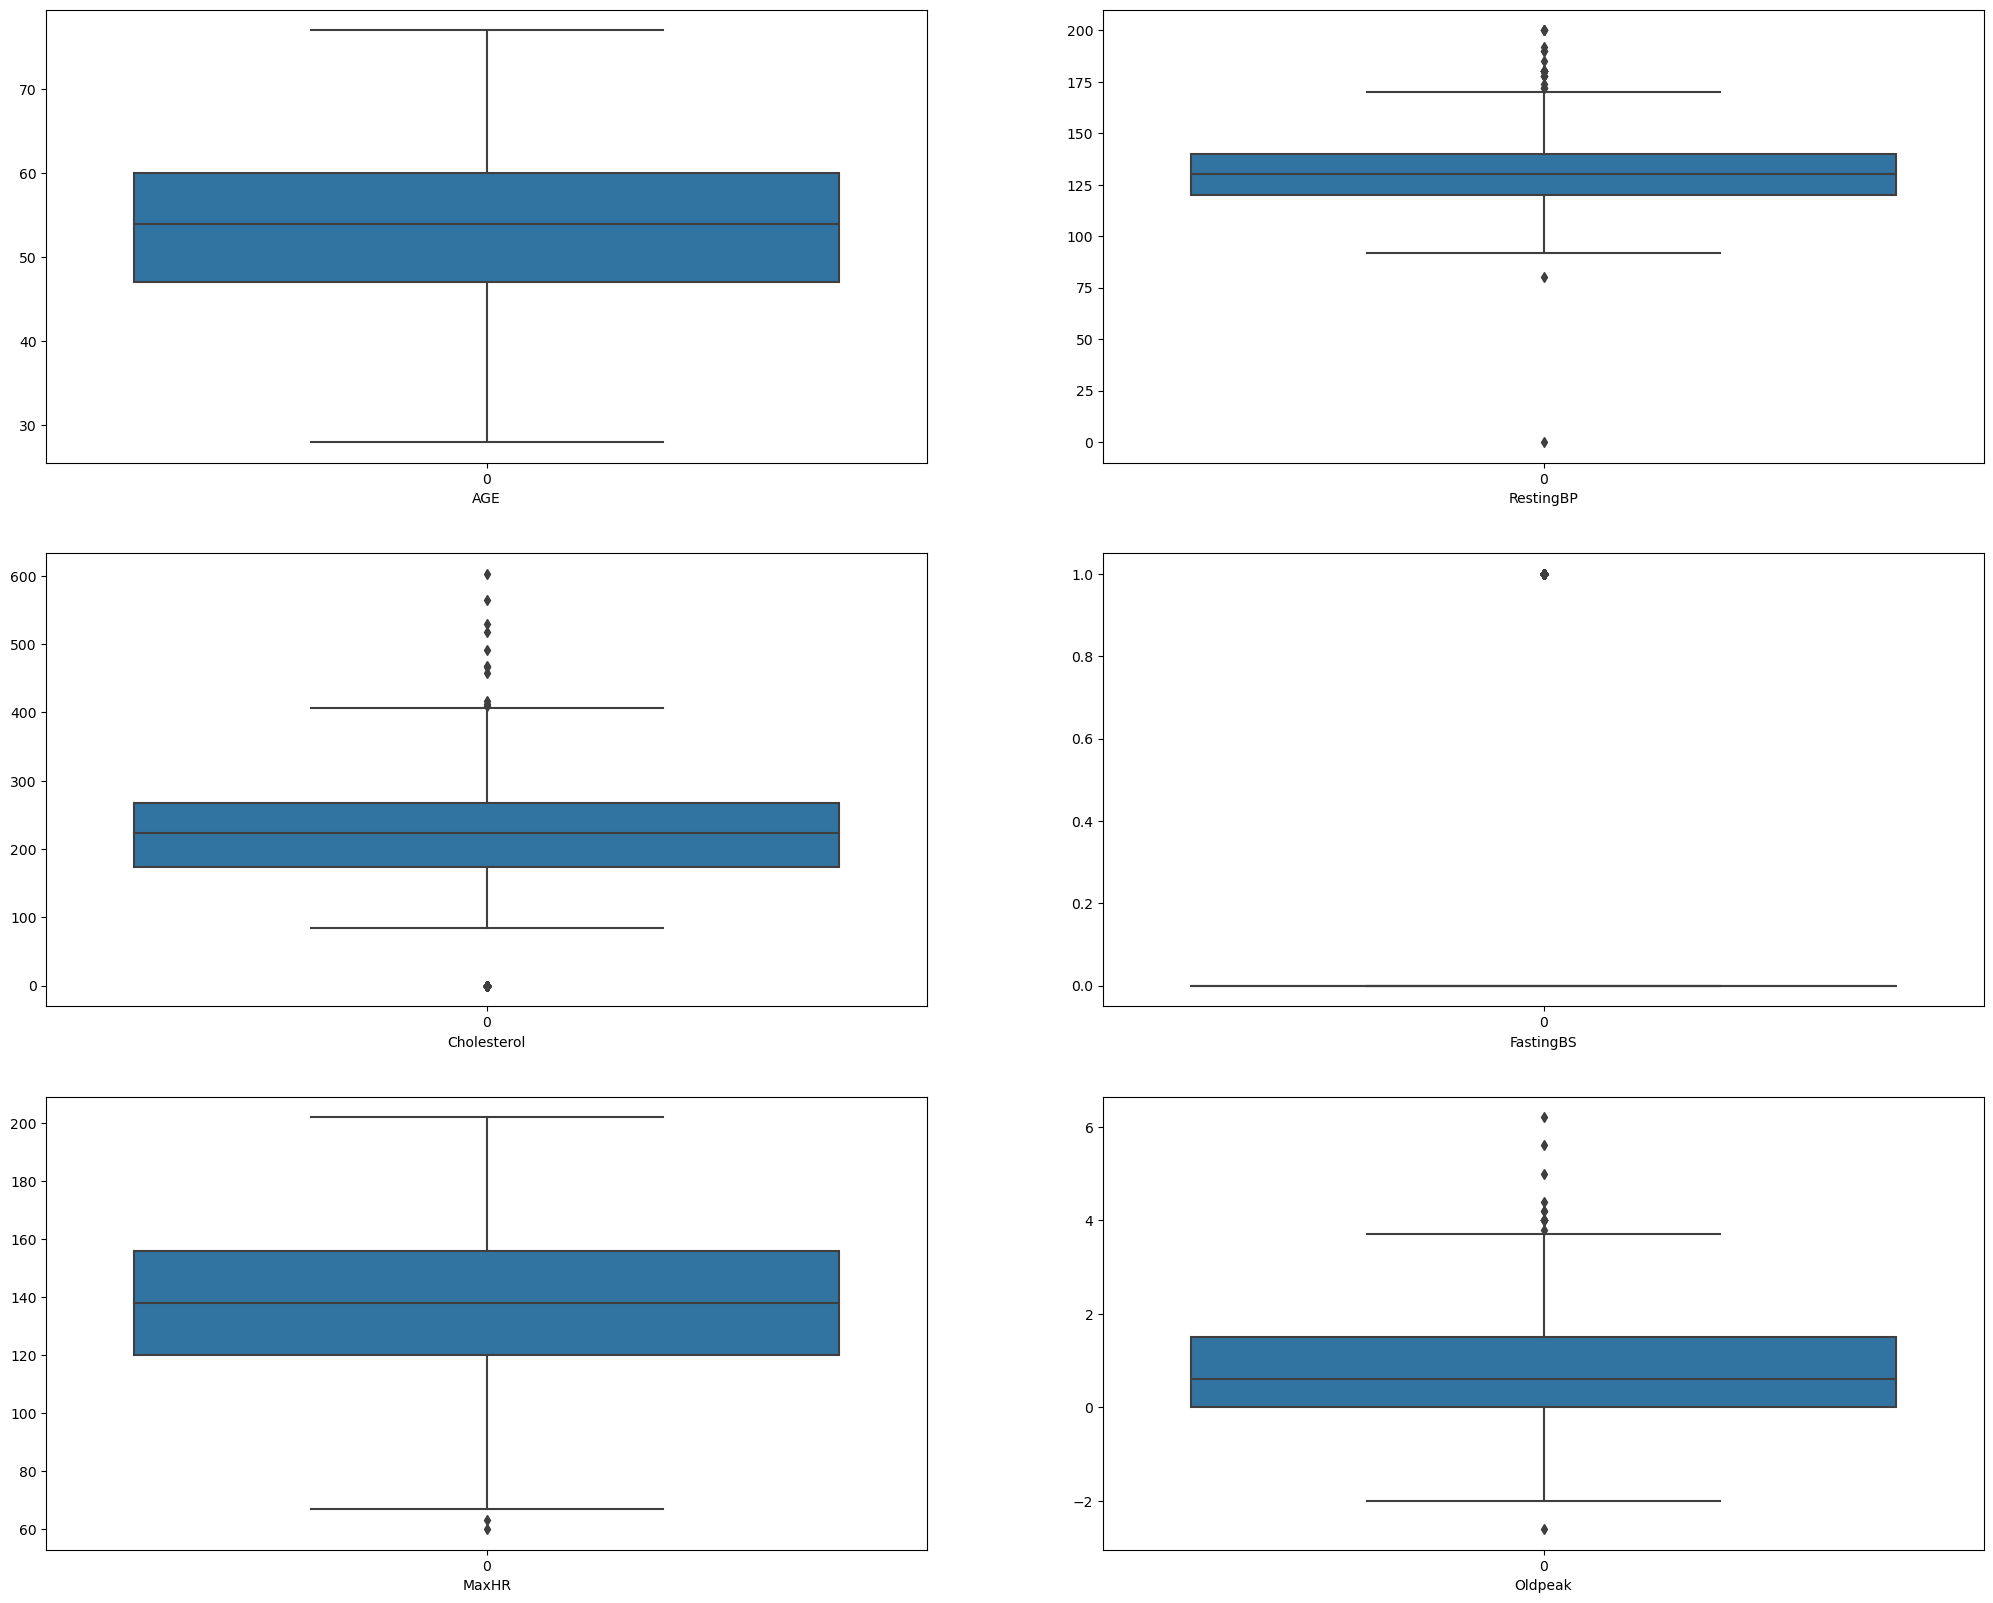

In [61]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.boxplot(df['Age'])
plt.xlabel("AGE")

plt.subplot(3,2,2)
sns.boxplot(df['RestingBP'])
plt.xlabel("RestingBP")

plt.subplot(3,2,3)
sns.boxplot(df['Cholesterol'])
plt.xlabel("Cholesterol")

plt.subplot(3,2,4)
sns.boxplot(df['FastingBS'])
plt.xlabel("FastingBS")

plt.subplot(3,2,5)
sns.boxplot(df['MaxHR'])
plt.xlabel("MaxHR")

plt.subplot(3,2,6)
sns.boxplot(df['Oldpeak'])
plt.xlabel("Oldpeak")

plt.show()

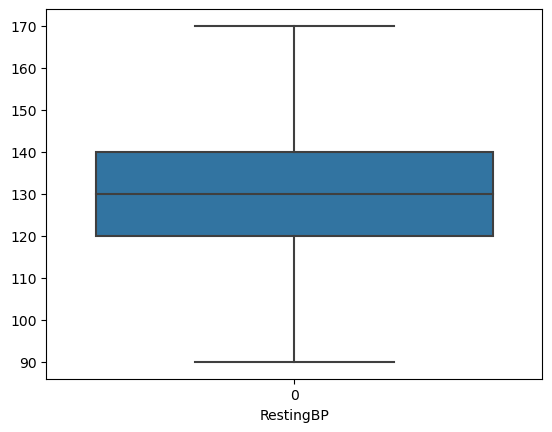

In [69]:
#from above boxplot we can see that outpeak,MaxHR,Cholesterol and RestingBP having outliers
# with the help of winsonizer remove the outliers
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["RestingBP"],tail="both")
df["RestingBP"]=winsor.fit_transform(df[["RestingBP"]])
sns.boxplot(df["RestingBP"])
plt.xlabel("RestingBP")
plt.show()

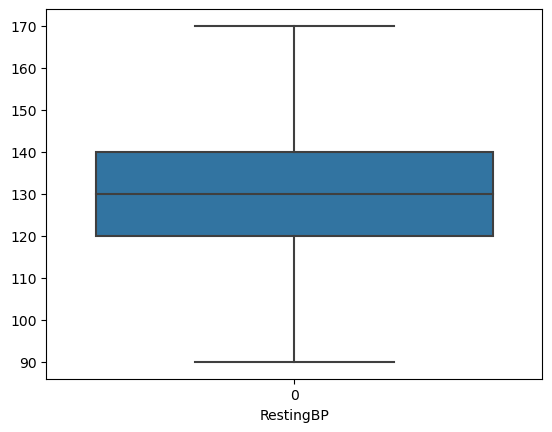

In [70]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Cholesterol"],tail="both")
df["Cholesterol"]=winsor.fit_transform(df[["Cholesterol"]])
sns.boxplot(df["RestingBP"])
plt.xlabel("RestingBP")
plt.show()

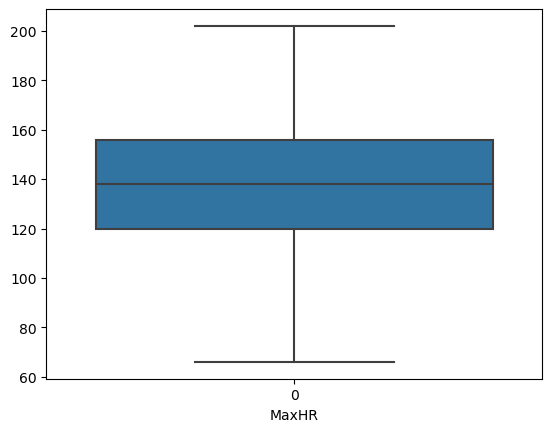

In [71]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["MaxHR"],tail="both")
df["MaxHR"]=winsor.fit_transform(df[["MaxHR"]])
sns.boxplot(df["MaxHR"])
plt.xlabel("MaxHR")
plt.show()

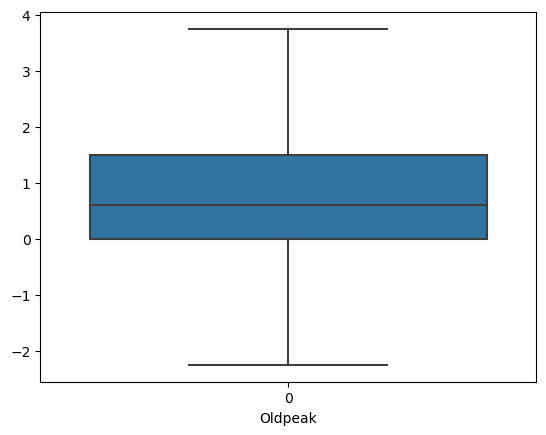

In [72]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Oldpeak"],tail="both")
df["Oldpeak"]=winsor.fit_transform(df[["Oldpeak"]])
sns.boxplot(df["Oldpeak"])
plt.xlabel("Oldpeak")
plt.show()

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["ChestPainType"]=le.fit_transform(df["ChestPainType"])
df["RestingECG"]=le.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=le.fit_transform(df["ST_Slope"])

In [81]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0.0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0.0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0.0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0.0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0.0,1,122,0,0.0,2,0


In [82]:
x=df.drop(["HeartDisease"],axis=1)
y=df["HeartDisease"]

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.11853217, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.3124939 , -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.85127647, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.85127647,  1.05211381]])

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,stratify=y,random_state=10)

In [85]:
x_train.shape

(734, 11)

In [86]:
x_test.shape

(184, 11)

In [87]:
y_train.value_counts()

1    406
0    328
Name: HeartDisease, dtype: int64

In [89]:
328/406

0.8078817733990148

In [88]:
y_test.value_counts()

1    102
0     82
Name: HeartDisease, dtype: int64

In [90]:
82/102

0.803921568627451

## Train a model using decision tree and then using bagging

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
scores.mean()

0.7330185317177476

standalone Decision tree gives 73.30% accurancy for unseen data 

### Use bagging now with decision tree

In [103]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=0), 
    n_estimators=100, 
    max_samples=0.9, 
    oob_score=True,
    random_state=0
)

scores = cross_val_score(bag_model, x, y, cv=5)
scores.mean()

0.800576146353053

#### You can see that with bagging the score improved from 73.30% to 80%

## Train a model using standalone support vector machine and then using bagging

In [98]:
from sklearn.svm import SVC
model=SVC()
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.6873129009265859

### Use bagging now with svm

In [99]:
bag_model=BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=10
)
scores=cross_val_score(bag_model,x,y,cv=5)
scores.mean()

0.6785875504870515

We can see that bagging using SVC doesn't have much difference between model accurancy.The bagging algorithm use when dataset is high variance and unstable.So,decision tree is best base estimator for bagging to get better accurancy.